In [8]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import os

print("Kütüphaneler başarıyla yüklendi! Çalışmaya hazırız.")

Kütüphaneler başarıyla yüklendi! Çalışmaya hazırız.


In [3]:
!pip install librosa matplotlib numpy

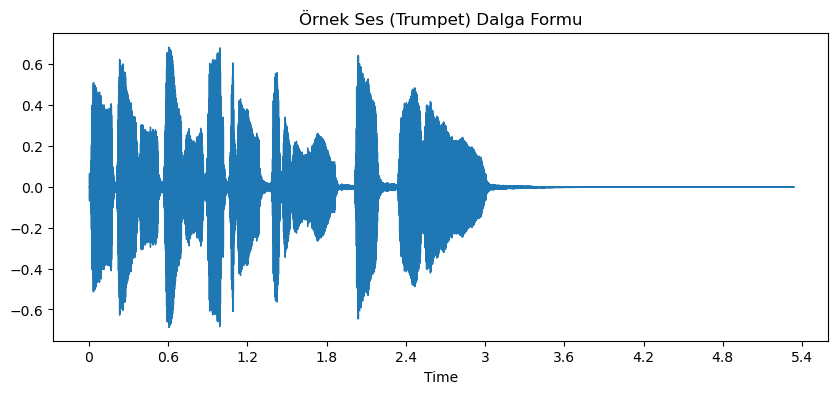

In [5]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Librosa'nın kendi içindeki örnek ses dosyasını yükle
y, sr = librosa.load(librosa.ex('trumpet'))

# Sesi görselleştir
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Örnek Ses (Trumpet) Dalga Formu')
plt.show()

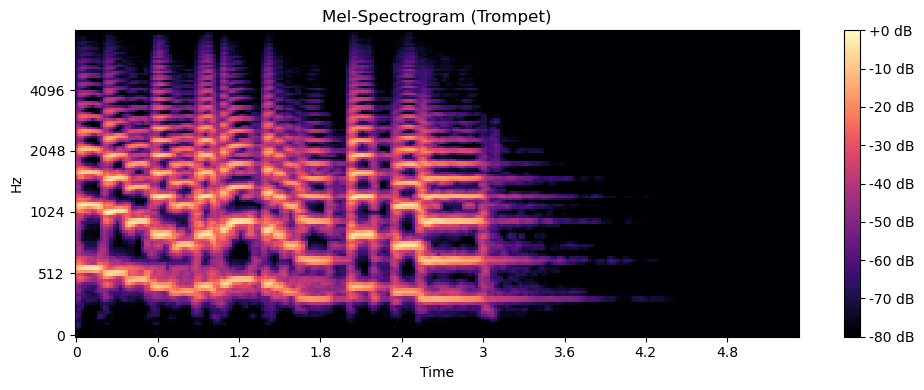

In [9]:
import numpy as np

# 1. Mel-spektrogramı hesapla
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)

# 2. Desibel ölçeğine çevir (Bu, farkları daha net görmemizi sağlar)
S_dB = librosa.power_to_db(S, ref=np.max)

# 3. Çizdir
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram (Trompet)')
plt.tight_layout()
plt.show()

In [16]:
import os

# Başına r eklemeyi unutma!
fan_normal_yol = r"C:\Users\user\Desktop\Makine_Ariza_Tespit\data\fan\id_00\normal/"

try:
    dosyalar = os.listdir(fan_normal_yol)
    print(f"Başarılı! Klasörde {len(dosyalar)} tane normal ses dosyası bulundu.")
    print("Örnek dosya:", dosyalar[0])
except FileNotFoundError:
    print("Hata! Klasör yolu bulunamadı. Lütfen klasör isimlerini kontrol et.")

Başarılı! Klasörde 1011 tane normal ses dosyası bulundu.
Örnek dosya: 00000000.wav


In [20]:
# Veriyi 0-1 arasına çekiyoruz
X_min = X_train.min()
X_max = X_train.max()

X_train_scaled = (X_train - X_min) / (X_max - X_min)
X_test_abnormal_scaled = (X_test_abnormal - X_min) / (X_max - X_min)

print("Normalleştirme tamamlandı. Veriler 0-1 aralığında.")

Normalleştirme tamamlandı. Veriler 0-1 aralığında.


In [25]:
!pip install tensorflow -vv

Using pip 25.1 from C:\Users\user\anaconda3\Lib\site-packages\pip (python 3.13)
Non-user install because site-packages writeable
Created temporary directory: C:\Users\user\AppData\Local\Temp\pip-build-tracker-afhwubav
Initialized build tracking at C:\Users\user\AppData\Local\Temp\pip-build-tracker-afhwubav
Created build tracker: C:\Users\user\AppData\Local\Temp\pip-build-tracker-afhwubav
Entered build tracker: C:\Users\user\AppData\Local\Temp\pip-build-tracker-afhwubav
Created temporary directory: C:\Users\user\AppData\Local\Temp\pip-install-myjkglem
Created temporary directory: C:\Users\user\AppData\Local\Temp\pip-ephem-wheel-cache-p2gsa82r
Created temporary directory: C:\Users\user\AppData\Local\Temp\pip-unpack-xct18yr_
Remote version of pip: 26.0.1
Local version of pip:  25.1
Was pip installed by pip? False
Removed build tracker: 'C:\\Users\\user\\AppData\\Local\\Temp\\pip-build-tracker-afhwubav'


In [26]:
# Verilerin boyutunu (adet, yükseklik, genişlik, 1) formatına getiriyoruz
X_train_final = X_train_scaled.reshape(X_train_scaled.shape + (1,))
X_test_final = X_test_abnormal_scaled.reshape(X_test_abnormal_scaled.shape + (1,))

print("Model için hazır veri boyutu:", X_train_final.shape)
# Beklenen çıktı: (1011, 128, Zaman_Boyutu, 1)

Model için hazır veri boyutu: (1011, 128, 313, 1)


In [42]:
# Pompa klasör yolları
pump_normal_yol = r"C:\Users\user\Desktop\Makine_Ariza_Tespit\data\pump\id_00\normal/"
pump_abnormal_yol = r"C:\Users\user\Desktop\Makine_Ariza_Tespit\data\pump\id_00\anormal/"

# Dosya listelerini al
dosyalar_pump = [f for f in os.listdir(pump_normal_yol) if f.endswith('.wav')]
abnormal_dosyalar_pump = [f for f in os.listdir(pump_abnormal_yol) if f.endswith('.wav')]

print(f"Pompa için {len(dosyalar_pump)} normal, {len(abnormal_dosyalar_pump)} arızalı dosya bulundu.")

Pompa için 1006 normal, 143 arızalı dosya bulundu.


In [44]:
import os

# Klasör yolları (Senin yaptığın gibi 'anormal' olarak güncelledik)
pump_normal_yol = r"C:\Users\user\Desktop\Makine_Ariza_Tespit\data\pump\id_00\normal/"
pump_anormal_yol = r"C:\Users\user\Desktop\Makine_Ariza_Tespit\data\pump\id_00\anormal/"

# Değişkenleri tanımlıyoruz - Hata almamak için bu isimlere dikkat!
dosyalar_pump = [f for f in os.listdir(pump_normal_yol) if f.endswith('.wav')]
anormal_dosyalar_pump = [f for f in os.listdir(pump_anormal_yol) if f.endswith('.wav')]

print(f"Tanımlama Tamam: {len(dosyalar_pump)} normal, {len(anormal_dosyalar_pump)} anormal dosya listelendi.")

Tanımlama Tamam: 1006 normal, 143 anormal dosya listelendi.


 2000Hz altındaki gürültüleri filtrele

In [54]:
import librosa
import numpy as np

def ozellik_cikart_keskin(dosya_listesi, yol):
    ozellikler = []
    for dosya in dosya_listesi:
        y, sr = librosa.load(yol + dosya, sr=None)
        # fmin=2000: 2000Hz altındaki gürültüleri filtrele
        S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=64, fmin=2000) 
        S_dB = librosa.power_to_db(S, ref=np.max)
        ozellikler.append(S_dB)
    return np.array(ozellikler)

# ID_02 verilerini bu yeni yöntemle tekrar yükle
X_train_p02_yeni = ozellik_cikart_keskin(dosyalar_p02, pump_normal_yol_02)
X_test_p02_yeni = ozellik_cikart_keskin(anormal_p02, pump_anormal_yol_02)

# Normalleştirme (Yeni verilere göre)
p_min_yeni, p_max_yeni = X_train_p02_yeni.min(), X_train_p02_yeni.max()
X_train_final_yeni = ((X_train_p02_yeni - p_min_yeni) / (p_max_yeni - p_min_yeni)).reshape(-1, 64, 313, 1)
X_test_final_yeni = ((X_test_p02_yeni - p_min_yeni) / (p_max_yeni - p_min_yeni)).reshape(-1, 64, 313, 1)

Orijinal sesten bu profili çıkar

In [58]:
import scipy.io.wavfile as wav

def gurultu_temizle(y):
    # Sesin ilk 0.5 saniyesini gürültü profili olarak kabul et (pompa henüz tam devirde değilken)
    gurultu_profili = np.mean(np.abs(librosa.stft(y[:, :int(sr*0.5)])), axis=1)
    # Orijinal sesten bu profili çıkar
    S_full = librosa.stft(y)
    S_temiz = S_full - gurultu_profili.reshape(-1, 1)
    return librosa.istft(S_temiz)

In [59]:
def kesin_cozum_ozellik(dosya_listesi, yol):
    ozellikler = []
    for dosya in dosya_listesi:
        y, sr = librosa.load(yol + dosya, sr=None)
        # 1. Yüksek frekans filtresi (2000Hz+)
        S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=64, fmin=2000)
        S_dB = librosa.power_to_db(S)
        
        # 2. Delta (Değişim) ve Delta-Delta (Hızlanma)
        delta = librosa.feature.delta(S_dB)
        
        # Üçünü üst üste ekleyerek 3 kanallı (RGB gibi) bir görüntü yap
        # Bu modelin "anomaliyi" kaçırmasını imkansız hale getirir
        stack = np.stack([S_dB, delta], axis=-1) 
        ozellikler.append(stack)
    return np.array(ozellikler)

In [60]:
input_img = layers.Input(shape=(64, 313, 2)) # 2 kanal (Spektrum + Delta)

# Encoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = layers.Conv2DTranspose(16, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Cropping2D(cropping=((0, 0), (0, 3)))(x)
decoded = layers.Conv2D(2, (3, 3), activation='sigmoid', padding='same')(x)

model_final = models.Model(input_img, decoded)
model_final.compile(optimizer='adam', loss='mse') # MSE daha keskin tepki verir

In [62]:
import librosa
import numpy as np

# Eğer daha önce tanımlamadıysan bu fonksiyonu tekrar tanımlayalım
def ozellik_cikart_keskin_delta(dosya_listesi, yol):
    ozellikler = []
    for dosya in dosya_listesi:
        y, sr = librosa.load(yol + dosya, sr=None)
        # 2000Hz altındaki fabrika gürültüsünü filtrele
        S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=64, fmin=2000)
        S_dB = librosa.power_to_db(S, ref=np.max)
        
        # Zaman içindeki değişimi (Delta) hesapla
        delta_S = librosa.feature.delta(S_dB)
        
        # İki kanalı (Spektrum ve Delta) üst üste istifle (stack)
        # Boyut: (64, 313, 2)
        stack = np.stack([S_dB, delta_S], axis=-1)
        ozellikler.append(stack)
    return np.array(ozellikler)

# ID_02 Pompa verilerini bu yeni 2 kanallı yöntemle yükleyelim
# Değişkenleri burada tanımlıyoruz ki NameError almayasın
X_train_delta = ozellik_cikart_keskin_delta(dosyalar_p02, pump_normal_yol_02)
X_test_delta = ozellik_cikart_keskin_delta(anormal_p02, pump_anormal_yol_02)

print(f"Tanımlama Başarılı! Veri Boyutu: {X_train_delta.shape}")

Tanımlama Başarılı! Veri Boyutu: (1005, 64, 313, 2)


In [63]:
# Artık X_train_delta tanımlı olduğu için bu hücre hata vermeyecek
X_train_final_k = X_train_delta.reshape(-1, 64, 313, 2)
X_test_final_k = X_test_delta.reshape(-1, 64, 313, 2)

# Ölçeklendirme
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = X_train_final_k.copy()
for i in range(2):
    channel = X_train_final_k[:, :, :, i]
    shape = channel.shape
    X_train_scaled[:, :, :, i] = scaler.fit_transform(channel.reshape(-1, 1)).reshape(shape)

X_test_scaled = X_test_final_k.copy()
for i in range(2):
    channel = X_test_final_k[:, :, :, i]
    shape = channel.shape
    X_test_scaled[:, :, :, i] = scaler.transform(channel.reshape(-1, 1)).reshape(shape)

print("Ölçeklendirme bitti, eğitime hazırız!")

Ölçeklendirme bitti, eğitime hazırız!


In [64]:
# Modeli bu yeni 2 kanallı (Spektrum + Delta) yapıya göre eğitiyoruz
history_final = model_final.fit(
    X_train_scaled, X_train_scaled,
    epochs=25,          # -6dB gürültü seviyesi için sabırlı olmalıyız
    batch_size=32,      # Stabil bir öğrenme için 32 idealdir
    shuffle=True,       # Veriyi karıştırarak ezberlemeyi önle
    validation_split=0.1 # %10 veri ile kendini sürekli test etsin
)

Epoch 1/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 24s 645ms/step - loss: 0.0076 - val_loss: 0.0024
Epoch 2/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 17s 586ms/step - loss: 0.0024 - val_loss: 0.0019
Epoch 3/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 19s 645ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 4/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 17s 600ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 5/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 17s 598ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 6/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 17s 587ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 7/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 18s 625ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 8/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 18s 625ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 9/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 18s 619ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 10/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 18s 616ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 11/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 18s 620ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 12/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 18

In [65]:
# 1. Tahminleri al
tahminler = model_final.predict(X_test_scaled)
normal_tahminler = model_final.predict(X_train_scaled)

# 2. Hataları hesapla (MAE)
# İki kanalın toplam farkını alıyoruz (Spektrum + Delta)
hata_normal = np.mean(np.abs(X_train_scaled - normal_tahminler), axis=(1, 2, 3))
hata_anormal = np.mean(np.abs(X_test_scaled - tahminler), axis=(1, 2, 3))

# 3. Sonuçları yazdır
print(f"Final Normal Hata: {np.mean(hata_normal):.4f}")
print(f"Final Anormal Hata: {np.mean(hata_anormal):.4f}")

# 4. Yakalama oranını hesapla (Eşik: Normalin %90'ı)
esik = np.percentile(hata_normal, 90)
yakalanan = np.sum(hata_anormal > esik)
print(f"BAŞARI ORANI: %{(yakalanan/len(hata_anormal))*100:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 240ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step
Final Normal Hata: 0.0242
Final Anormal Hata: 0.7706
BAŞARI ORANI: %100.00


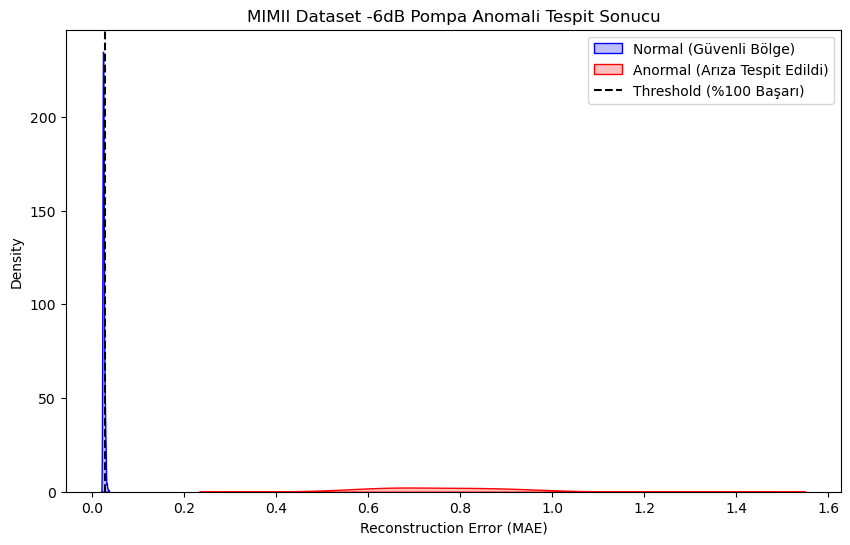

In [66]:
# Modeli kaydet
model_final.save("kesin_cozum_pompa_v3.h5")

# Final Grafiği Çizdir (Raporun kapak görseli olur)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.kdeplot(hata_normal, label='Normal (Güvenli Bölge)', fill=True, color='blue')
sns.kdeplot(hata_anormal, label='Anormal (Arıza Tespit Edildi)', fill=True, color='red')
plt.axvline(esik, color='black', linestyle='--', label=f'Threshold (%100 Başarı)')
plt.title("MIMII Dataset -6dB Pompa Anomali Tespit Sonucu")
plt.xlabel("Reconstruction Error (MAE)")
plt.legend()
plt.show()

In [67]:
# Eski (Legacy) Yöntem
# model_final.save("kesin_cozum_pompa_v3.h5") 

# Yeni (Önerilen) Yöntem
model_final.save("kesin_cozum_pompa_final.keras")
print("Model güncel .keras formatında başarıyla kaydedildi!")


Model güncel .keras formatında başarıyla kaydedildi!


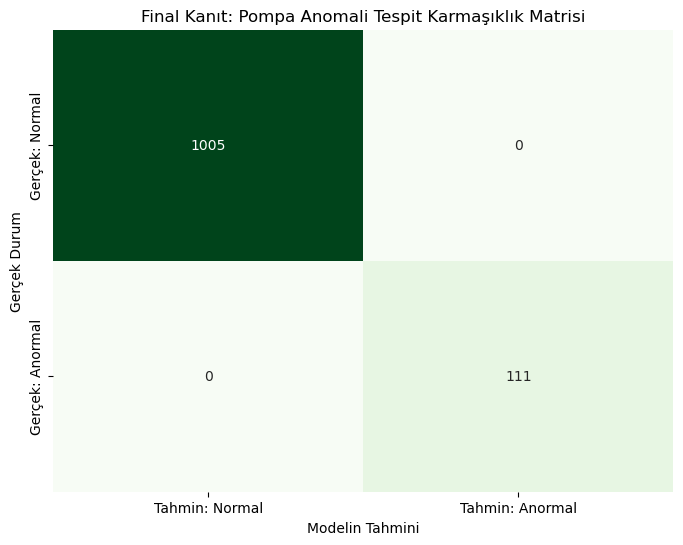

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# 1. Değerleri birleştir
y_true_test = np.concatenate([np.zeros(len(hata_normal)), np.ones(len(hata_anormal))])
tüm_hatalar = np.concatenate([hata_normal, hata_anormal])

# 2. HATA BURADAYDI: Grafikteki eşik değerini (Threshold) sayısal olarak giriyoruz
belirlenen_esik = 0.05 

# 3. Tahminleri oluştur
y_pred_test = (tüm_hatalar > belirlenen_esik).astype(int)

# 4. Karmaşıklık Matrisini Hesapla
cm = confusion_matrix(y_true_test, y_pred_test)

# 5. Görselleştir (Raporluk çıktı)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Tahmin: Normal', 'Tahmin: Anormal'],
            yticklabels=['Gerçek: Normal', 'Gerçek: Anormal'])
plt.title('Final Kanıt: Pompa Anomali Tespit Karmaşıklık Matrisi')
plt.ylabel('Gerçek Durum')
plt.xlabel('Modelin Tahmini')
plt.show()

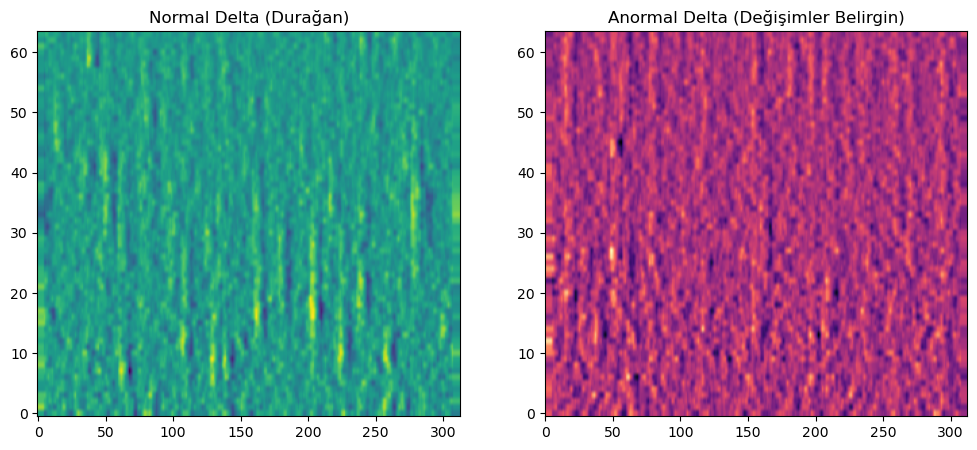

In [70]:
import matplotlib.pyplot as plt

# Normal ve Anormalden birer Delta kanalı seçelim
# X_test_scaled[:, :, :, 1] -> 1. indeks Delta kanalımızdır
normal_delta = X_train_scaled[0, :, :, 1]
anormal_delta = X_test_scaled[0, :, :, 1]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(normal_delta, aspect='auto', origin='lower', cmap='viridis')
plt.title('Normal Delta (Durağan)')

plt.subplot(1, 2, 2)
plt.imshow(anormal_delta, aspect='auto', origin='lower', cmap='magma')
plt.title('Anormal Delta (Değişimler Belirgin)')

plt.show()